## 01-雨水动画.gif

动画是描述现象的工具，相比于静态图，我们人类经常执迷于动画和交互图表。在探求时间序列数据时，诸如股价趋势、气候变化、季节等, 动画更有洞感。


### 前期准备
matplotlib中拥有一个FuncAnimation函数，该函数可以帮助实现动画。如果想将运行的结果存储为gif、mp4，你可能需要在电脑上配置好ffmpeg或imagemagick(请自行百度谷歌)。
# Matplotlib
### 1.最基础的动画

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

#定制画布
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
#折线图对象line
line, = ax.plot([], [], lw=3)

#初始化
def init():
    line.set_data([], [])
    return line,

#生成每一帧所用的函数
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

#帧数frame=200，帧间隔interval=20
#blit不知何意，直接用吧
anim = FuncAnimation(fig, animate, init_func=init, 
                     frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

# 动图1


### 2.螺旋

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


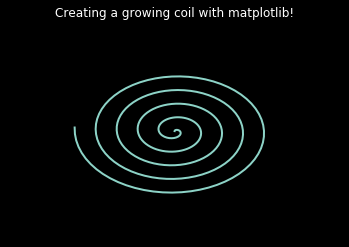

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 

    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 

    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=300, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick') 

### 3. 实时更新图
当原始数据发生更改时，之前绘制的图就会发生变化， 参考自 sentdex(一位youtube上的up主)

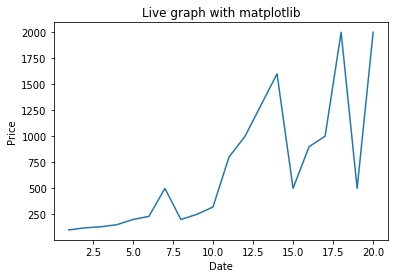

In [4]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	

    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()

上面的这个股票可视化代码，需要存放于py文件中，我们会在命令行中运行，当stocks.txt中的数据发生更改的时候，图片也会发生变动。

# Celluoid
Celluoid简化了matplotlib生成动画的代码，Celluoid会先生成一个画布，然后每隔一段时间对绘图进行拍照(帧)，最后将所有的帧合并。

安装celluoid

In [6]:
!pip3 install celluloid

In [ ]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')